# Matplotlib e Pandas

O Pandas é uma biblioteca que permite a manipulação de dados de forma simples e eficiente. Ela é construída sobre o NumPy e permite a manipulação de dados de forma simples e eficiente. Quanto a gráficos, o Pandas utiliza o Matplotlib como base para a geração de gráficos.



## Base de dados utilizada

Para este notebook, utilizaremos a base de dados do top 10 IBOV de maio a agosto de 2023. A base de dados foi obtida no site do Yahoo Finance. O IBOV é o índice da Bovespa, que é a bolsa de valores brasileira. O IBOV é composto pelas ações mais negociadas na bolsa de valores brasileira. Para compor o IBOV, é feito um cálculo de ponderação das ações, onde as ações mais negociadas possuem maior peso no índice. O IBOV é um índice que é utilizado para medir o desempenho médio das cotações das ações mais negociadas na bolsa de valores brasileira.

Este material é didático e não tem como objetivo a recomendação de compra ou venda de ativos.

In [2]:
import pandas as pd

ARQUIVO_TOP_10_IBOV = 'dados/top_10_ibov_mai_ago_2023.csv'

df_top_10_ibov = pd.read_csv(ARQUIVO_TOP_10_IBOV)
df_top_10_ibov['Date'] = pd.to_datetime(df_top_10_ibov['Date'], format='%Y-%m-%d')
df_top_10_ibov = df_top_10_ibov.set_index('Date', drop=True)
df_top_10_ibov.head()

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
Date,,,,,,,,,,
2023-01-02,87.478874,40.327332,31.615412,12.039818,14.19,23.893169,13.879215,37.771538,22.264847,50.636215
2023-01-03,87.322311,39.572250,31.026070,11.636853,14.17,23.395597,13.190460,36.829731,21.950058,49.391312
2023-01-04,87.478874,40.635326,31.425303,11.725308,14.25,23.463890,13.228148,37.077576,22.315893,49.974247
2023-01-05,88.946640,40.714806,32.860638,12.088961,14.29,24.195612,13.802876,37.156883,23.039053,50.389210
2023-01-06,90.355698,40.734676,33.316906,12.373984,14.32,24.615131,14.189168,37.702141,22.894421,51.347595


In [3]:
df_top_10_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2023-01-02 to 2023-06-29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALE3   123 non-null    float64
 1   ELET3   123 non-null    float64
 2   BBAS3   123 non-null    float64
 3   B3SA3   123 non-null    float64
 4   ABEV3   123 non-null    float64
 5   ITUB4   123 non-null    float64
 6   BBDC4   123 non-null    float64
 7   WEGE3   123 non-null    float64
 8   PETR3   123 non-null    float64
 9   RENT3   123 non-null    float64
dtypes: float64(10)
memory usage: 10.6 KB


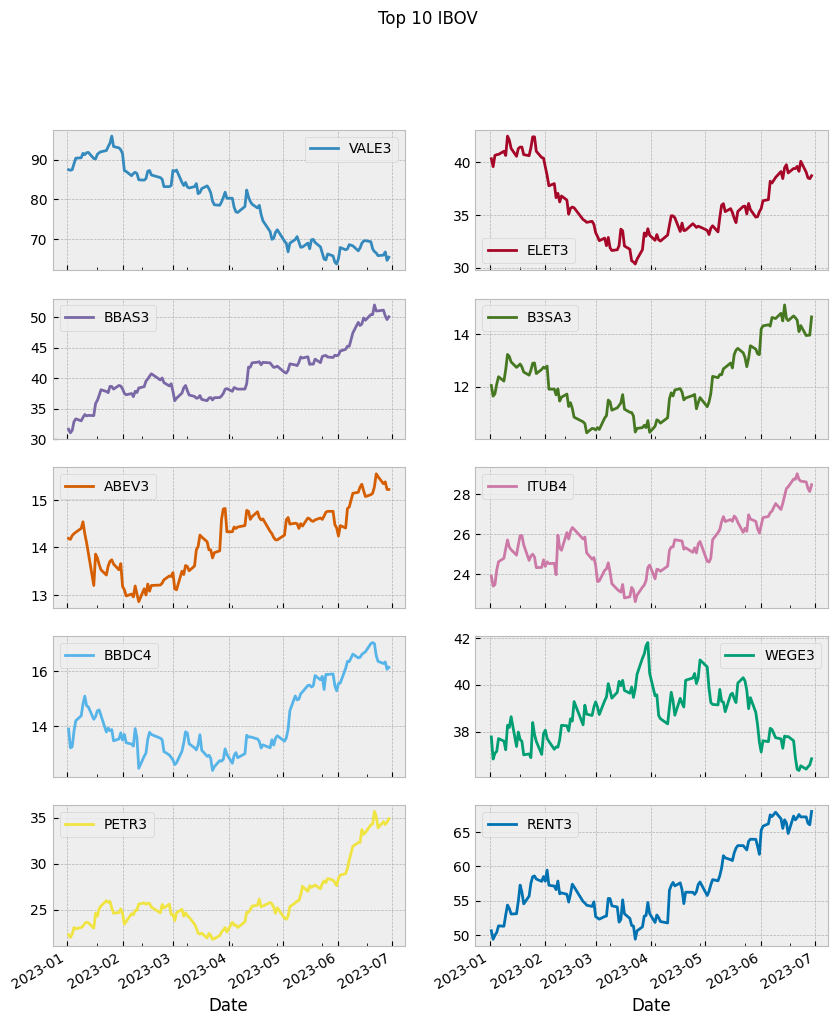

In [4]:
import matplotlib.pyplot as plt

plt.style.use('bmh')

df_top_10_ibov.plot(figsize=(10, 12), title='Top 10 IBOV', subplots=True, layout=(5, 2))
plt.show()

In [5]:
df_top_10_ibov.index


DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2023-06-16', '2023-06-19', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27',
               '2023-06-28', '2023-06-29'],
              dtype='datetime64[ns]', name='Date', length=123, freq=None)

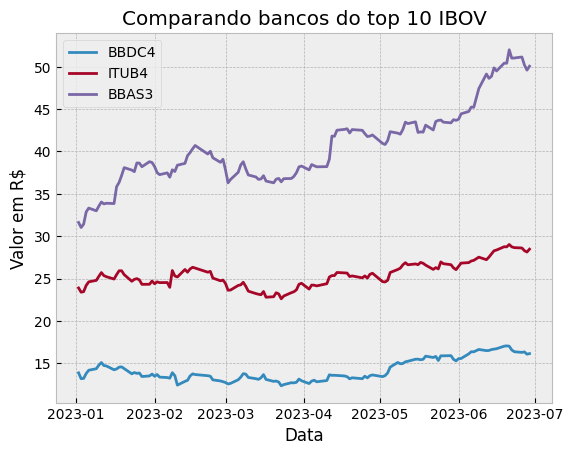

In [6]:
fig, ax = plt.subplots()

ax.plot(df_top_10_ibov.index, df_top_10_ibov['BBDC4'], label='BBDC4')
ax.plot(df_top_10_ibov.index, df_top_10_ibov['ITUB4'], label='ITUB4')
ax.plot(df_top_10_ibov.index, df_top_10_ibov['BBAS3'], label='BBAS3')

ax.set_title('Comparando bancos do top 10 IBOV')

ax.set_xlabel('Data')
ax.set_ylabel('Valor em R$')

ax.legend()

plt.show()

O método `pct_change()` calcula a variação percentual entre o valor atual e o valor anterior. O valor anterior é o valor da linha anterior. O valor da primeira linha é `NaN` (Not a Number), pois não há valor anterior para calcular a variação percentual.

In [8]:
variacao_diaria = df_top_10_ibov.pct_change()
variacao_diaria.head()

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
Date,,,,,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,-0.001790,-0.018724,-0.018641,-0.033469,-0.001409,-0.020825,-0.049625,-0.024934,-0.014138,-0.024585
2023-01-04,0.001793,0.026864,0.012868,0.007601,0.005646,0.002919,0.002857,0.006729,0.016667,0.011802
2023-01-05,0.016779,0.001956,0.045675,0.031014,0.002807,0.031185,0.043447,0.002139,0.032406,0.008304
2023-01-06,0.015842,0.000488,0.013885,0.023577,0.002099,0.017339,0.027986,0.014674,-0.006278,0.019020


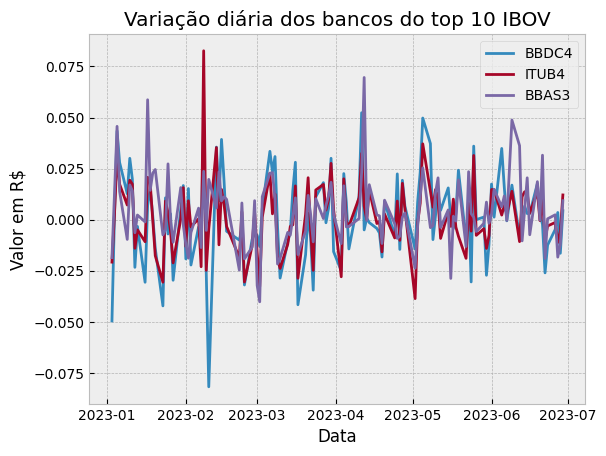

In [9]:
fig, ax = plt.subplots()

ax.plot(variacao_diaria.index, variacao_diaria['BBDC4'], label='BBDC4')
ax.plot(variacao_diaria.index, variacao_diaria['ITUB4'], label='ITUB4')
ax.plot(variacao_diaria.index, variacao_diaria['BBAS3'], label='BBAS3')

ax.set_title('Variação diária dos bancos do top 10 IBOV')

ax.set_xlabel('Data')
ax.set_ylabel('Valor em R$')

ax.legend()

plt.show()


Podemos chamar o ciclo de cores do Matplotlib para definir as cores dos gráficos.

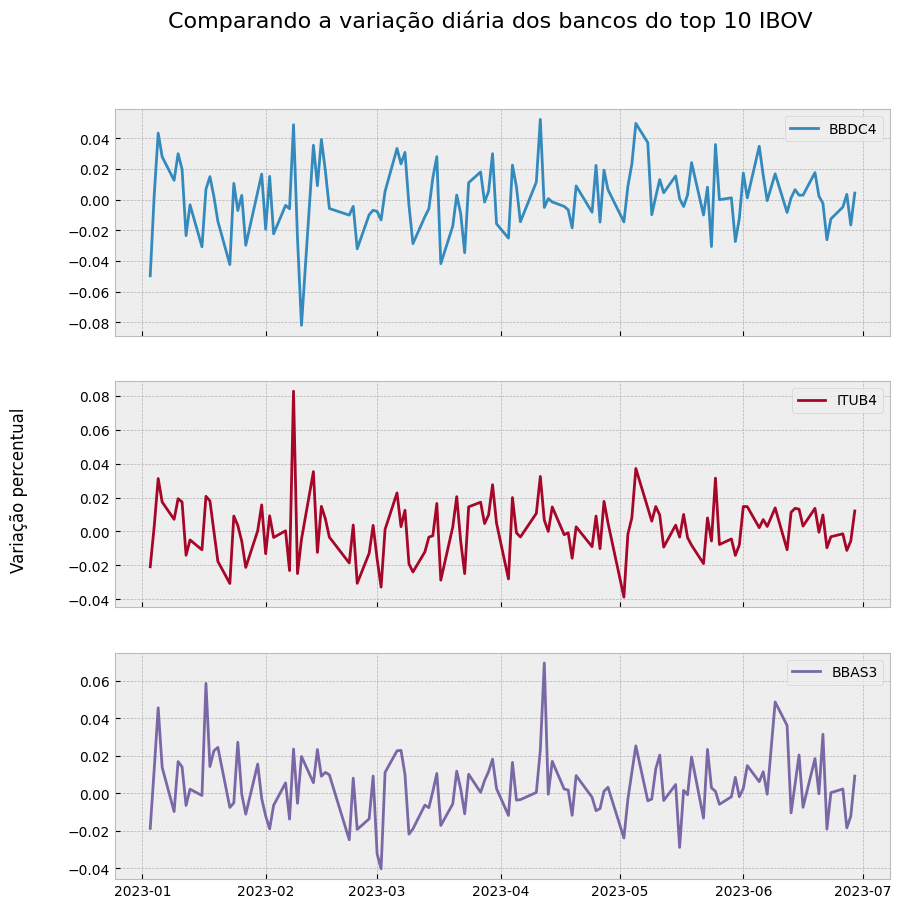

In [11]:
# quando ps gráficos compartilham de um mesmo sistema de eixo podemos utilziar o parâmetro share
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

# lista bancos
bancos = ['BBDC4', 'ITUB4', 'BBAS3']

for i, banco in enumerate(bancos):
    # retornando posicao(i) e o elemento(banco)
    axs[i].plot(variacao_diaria.index, variacao_diaria[banco], label=banco, color=f'C{i}')
    axs[i].legend()
    # axs[i].set_ylabel('Variação percentual')

fig.suptitle('Comparando a variação diária dos bancos do top 10 IBOV', fontsize=16)
fig.supylabel('Variação percentual')

plt.show()

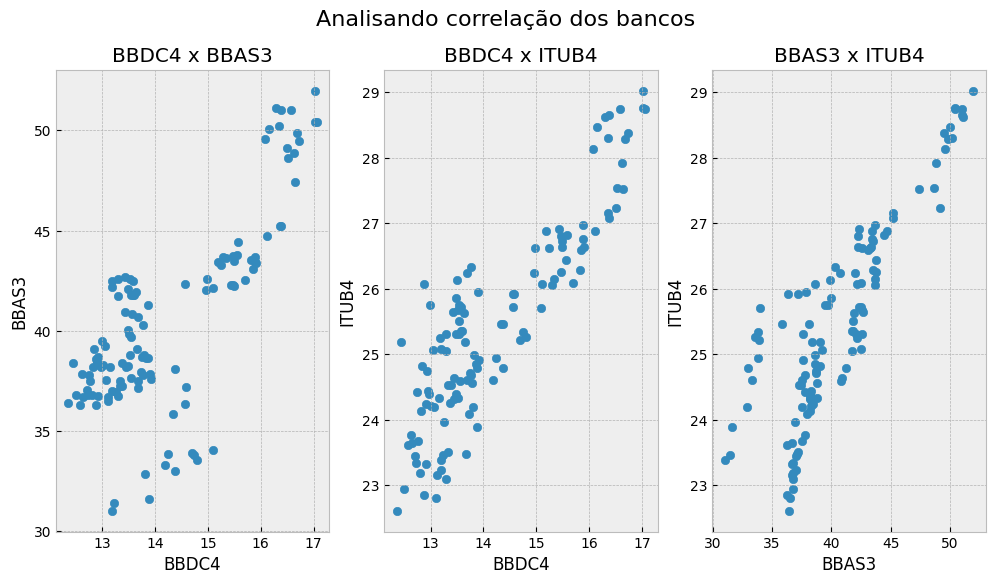

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

axs[0].scatter('BBDC4', 'BBAS3', data=df_top_10_ibov)
axs[0].set_xlabel('BBDC4')
axs[0].set_ylabel('BBAS3')
axs[0].set_title('BBDC4 x BBAS3')

axs[1].scatter('BBDC4', 'ITUB4', data=df_top_10_ibov)
axs[1].set_xlabel('BBDC4')
axs[1].set_ylabel('ITUB4')
axs[1].set_title('BBDC4 x ITUB4')

axs[2].scatter('BBAS3', 'ITUB4', data=df_top_10_ibov)
axs[2].set_xlabel('BBAS3')
axs[2].set_ylabel('ITUB4')
axs[2].set_title('BBAS3 x ITUB4')

fig.suptitle('Analisando correlação dos bancos', fontsize=16)

plt.show()

In [28]:
# ao realizarmos uma combinação de 3 bancos, pegando dois a dois
# o python tem em sua biblioteca nativa um conjunto de funções que trabalha 
# perfeitamente com essa situação -> itertools

from itertools import combinations

pares_bancos = list(combinations(bancos, 2))

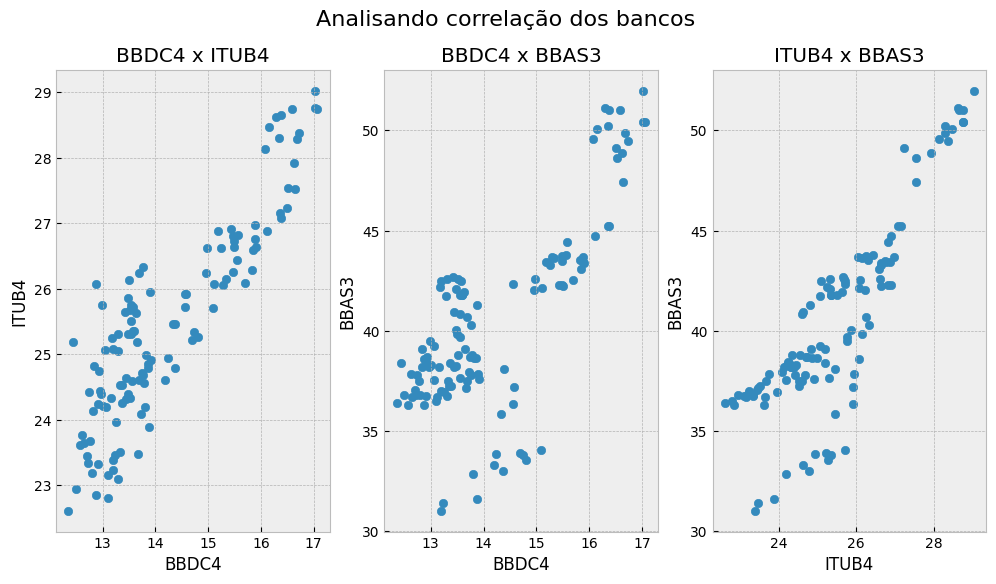

In [29]:
from itertools import combinations

pares_bancos = list(combinations(bancos, 2))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, par in enumerate(pares_bancos):
    axs[i].scatter(par[0], par[1], data=df_top_10_ibov)
    axs[i].set_xlabel(par[0])
    axs[i].set_ylabel(par[1])
    axs[i].set_title(f'{par[0]} x {par[1]}')

fig.suptitle('Analisando correlação dos bancos', fontsize=16)

plt.show()